In [1]:
# Project, bring in the file for analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import RidgeCV
from sklearn import tree
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import statsmodels.formula.api as smf
from sklearn import linear_model
import seaborn as sns
from string import letters
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import pylab
!pip install graphviz

%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

xl = pd.ExcelFile("Project_Data.xlsx")
xl.sheet_names
df = xl.parse("Sheet1")

#preview of the raw data and return the column names
df.head()
df.columns
# examine to see if there are any null rows
df.isnull().sum()
#there are rows with null data, let us remove these rows
df = df.dropna()
# we have 547 rows of data left, enough for the regression. the dataframe has been cleaned.
df.count()

#drop columns which have the dates
df = df.drop('Date', axis=1)
df = df.drop('Date.1', axis=1)

df.columns

#The data is all in differrent units: percentages, raw numbers, $'s, basis points. 
#If we want to analyse the relative effects of each independent variable on the dependent variables, 
#we'll need to normalise all the data.




Index([u'ASX Lit Share', u'ASX Dark Share', u'ASX On Market',
       u'ASX Continous Share', u'ASX Lit', u'Chi-X Lit', u'ASX Centre Point',
       u'Chi-X Dark', u'Reported to ASX', u'Reported to Chi-X', u'Market',
       u'Lit + Dark', u'Lit', u'Reports', u'CP Share', u'Row',
       u'Lit Trading - Vanilla', u'Trade Registration', u'Block Discovery',
       u'Undisclosed', u'CentrePoint', u'Icebergs', u'Pref', u'UCP',
       u'CXA Market', u'Specials', u'NBBO Trade Report', u'Portfolio Specials',
       u'Late Trades', u'Broker Pref', u'20-Day Realised SPI Vol', u'MOC',
       u'Spread Differrential', u'NBBO Trade Report.1', u'%Sweep of Lit',
       u'Index Rebalance', u'ASX Lit Share (20 MA)', u'ASX Dark Share (20 MA)',
       u'ASX On Market.1', u'ASX Continous Share (20 MA)',
       u'Number of Customer Meetings', u'Average Meetings',
       u'Sensitive Announcments'],
      dtype='object')

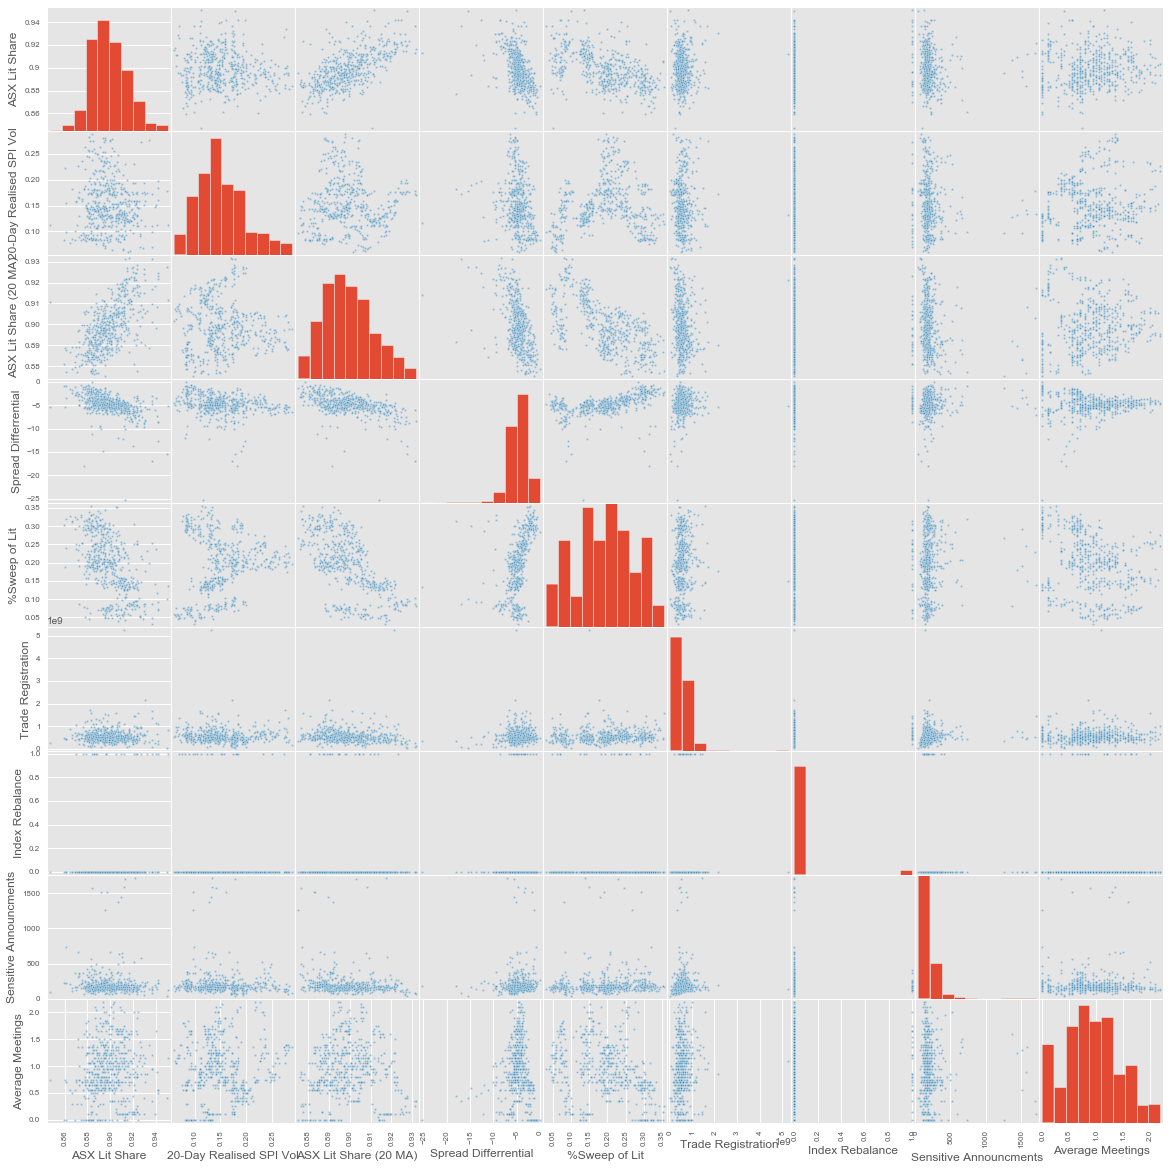

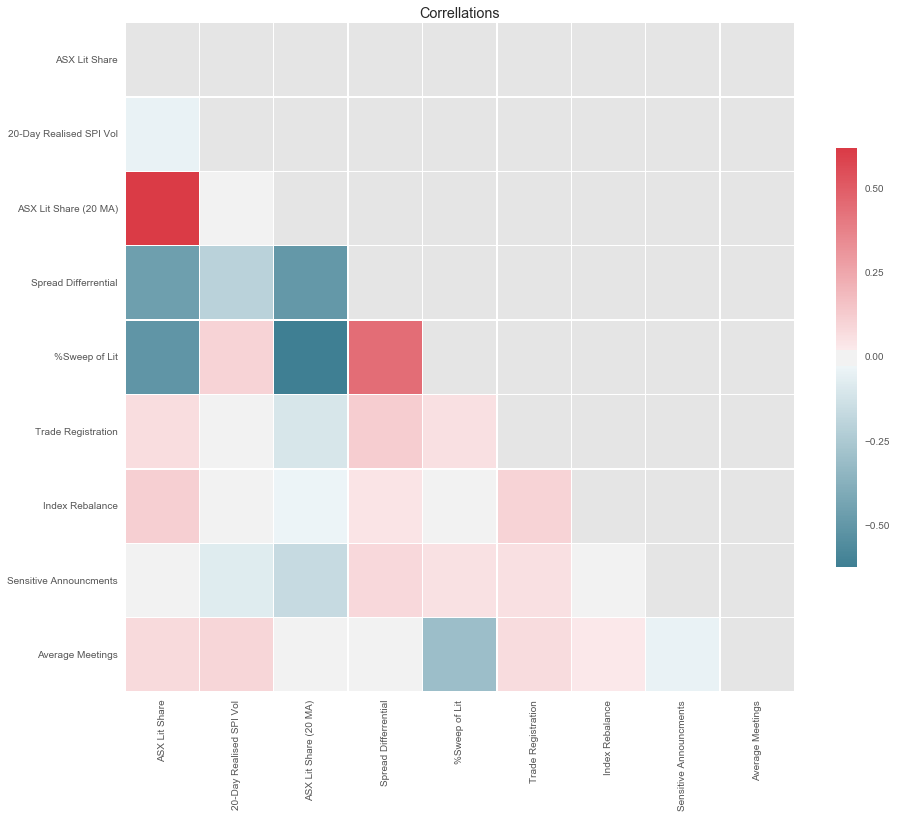

In [2]:
#Input the variables involved in the regression.


VariablesToUse = ['ASX Lit Share','20-Day Realised SPI Vol','ASX Lit Share (20 MA)',
       'Spread Differrential', '%Sweep of Lit','Trade Registration',
       'Index Rebalance','Sensitive Announcments','Average Meetings']

df = df[VariablesToUse]

pd.scatter_matrix(df, figsize=(20,20))
plt.show()

Corr = df.corr()

Corr





#generate a mask for the upper triangle
mask = np.zeros_like(Corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#setup a matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))
#generate a customer diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#draw the heatmap with the mask and correct aspect ration
ax.set_yticklabels(VariablesToUse)
ax.set_xticklabels(VariablesToUse)
ax.set_title('Correllations',)
sns.heatmap(Corr, mask=mask, cmap=cmap, vmax=.3, square=True,linewidths=0.5, cbar_kws={"shrink": 0.5}, ax=ax)



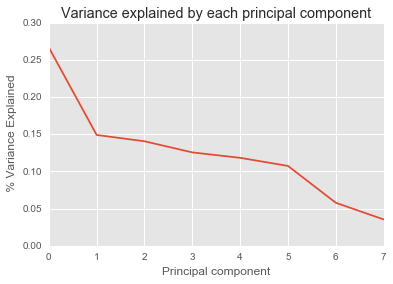

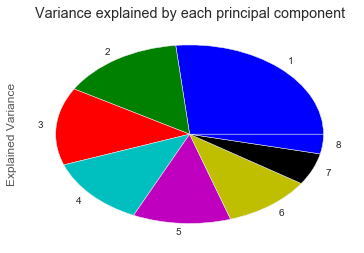

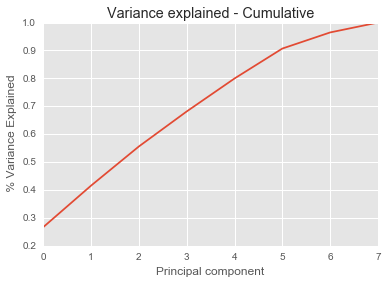

R^2 (Lasso CV reg.) = 0.536989935229

RMSE (Lasso CV reg.) = 0.67380927473



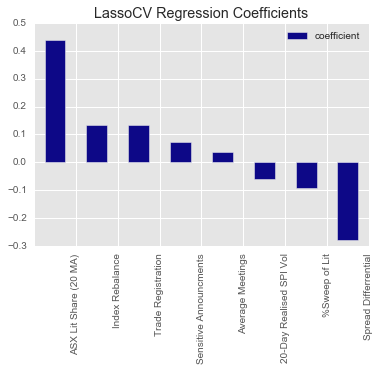

                  variable  coefficient
1    ASX Lit Share (20 MA)        0.438
5          Index Rebalance        0.135
4       Trade Registration        0.132
6   Sensitive Announcments        0.074
7         Average Meetings        0.037
0  20-Day Realised SPI Vol       -0.061
3            %Sweep of Lit       -0.091
2     Spread Differrential       -0.280

Sriram Test of LASCV [[ 0.51636551]] [ 0.04768911]


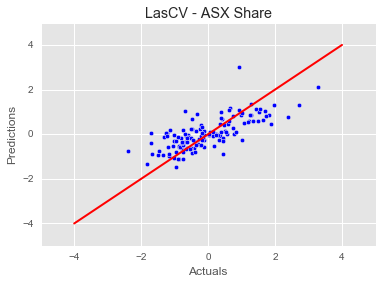

R^2 (Ridge CV reg.) = 0.516752328933

RMSE (Ridge CV reg.) = 0.688377479174

                  variable  coefficient
1    ASX Lit Share (20 MA)        0.341
5          Index Rebalance        0.111
4       Trade Registration        0.107
6   Sensitive Announcments        0.052
7         Average Meetings        0.017
0  20-Day Realised SPI Vol       -0.036
3            %Sweep of Lit       -0.148
2     Spread Differrential       -0.228



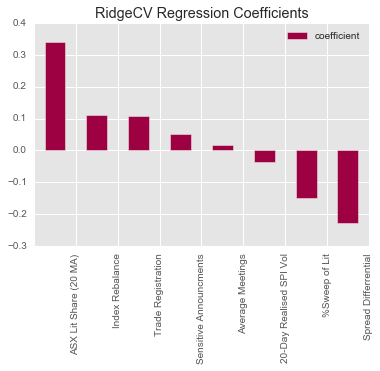

Sriram Test of RidgeCV [[ 0.44535454]] [ 0.04227355]


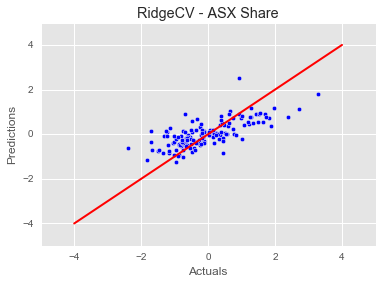

MSE (Decision Tree) = -1.18908354889

                         0     1
3            %Sweep of Lit 0.308
2     Spread Differrential 0.252
4       Trade Registration 0.095
7         Average Meetings 0.085
0  20-Day Realised SPI Vol 0.076
6   Sensitive Announcments 0.075
1    ASX Lit Share (20 MA) 0.073
5          Index Rebalance 0.037

Int64Index([0, 1], dtype='int64')

Random Forrest out of sample score = 0.48972299607

                   feature  importance
1    ASX Lit Share (20 MA)       0.364
2     Spread Differrential       0.182
3            %Sweep of Lit       0.144
4       Trade Registration       0.101
0  20-Day Realised SPI Vol       0.070
6   Sensitive Announcments       0.068
7         Average Meetings       0.047
5          Index Rebalance       0.023



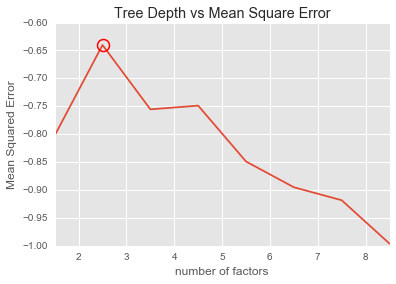

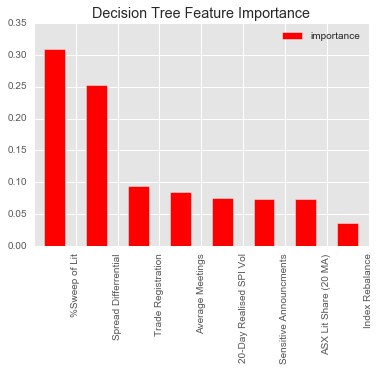

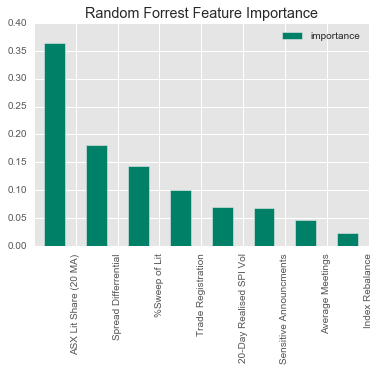

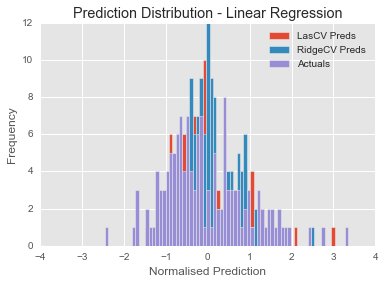

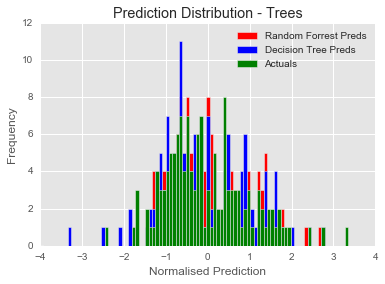

In [3]:
   

#The data is all in differrent units: percentages, raw numbers, $'s, basis points. 
#If we want to analyse the relative effects of each independent variable on the dependent variables, 
#we'll need to normalise all the data.

std_scale = preprocessing.StandardScaler().fit(df)
df_std = std_scale.transform(df)

ColumnNames = VariablesToUse

df_std = pd.DataFrame(df_std, columns = ColumnNames) 
df_std

#pd.scatter_matrix(dfLitShare_std, figsize=(20,20))
#plt.show()

#none of the independent variables look extremely correllated so we donot have to drop any independent variables
#dfLitShare_std.corr()

#plot the data to see how it looks
#pd.scatter_matrix(dfLitShare_std, figsize=(15,15))
#plt.show()

#dfLitShare_std.describe()

#let us start the regression. We have chosen Lasso Ridge & Decision Trees for our regression. For those features which are
#irrellevant, we want the coefficients to be 0 rather than very close to zero like ridge regression

X = df_std.iloc[:, 1:] #selection of columns, all the columns except the last one.
y = df_std.iloc[:,0]

#######################Principal Components Analysis##################################################################

pca = decomposition.PCA(n_components=8)
X_r = pca.fit_transform(X)

#print pca.explained_variance_ratio_

#Percentage of variance explained for each components
#print('explained variance ratio (first two components): %s'
#      % str(pca.explained_variance_ratio_))

plt.cla()
plt.plot(pca.explained_variance_ratio_)
plt.title('Variance explained by each principal component')
plt.ylabel(' % Variance Explained')
plt.xlabel('Principal component')
plt.show()

n = pd.DataFrame(pca.explained_variance_ratio_)
n['Principal_Component'] = [1,2,3,4,5,6,7,8]
n.columns = ['Variance_Explained', 'Principal_Component'] 
n = n[['Principal_Component', 'Variance_Explained'] ]

n.groupby('Principal_Component').Variance_Explained.sum().plot(kind='pie', title='Variance explained by each principal component')
plt.ylabel('Explained Variance')
plt.show()


plt.cla()
plt.plot(n.Variance_Explained.cumsum())
plt.title('Variance explained - Cumulative')
plt.ylabel(' % Variance Explained')
plt.xlabel('Principal component')
plt.show()


############################Identify the Train Test Split#######################################


from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


#######################use LassoCV to select best alpha, 100 partitions of the data#######################

from sklearn.linear_model import LassoCV
alpha_range = 0.01**np.arange(-3, 3)
lascv = LassoCV(normalize=True, alphas=alpha_range, cv =100)
lascv.fit(X_train, y_train)
lascv.alpha_
lascv.coef_
preds = lascv.predict(X_test)
#print lascv.coef_

R2 = r2_score(y_test, preds)
print 'R^2 (Lasso CV reg.) =', R2
print('')
print 'RMSE (Lasso CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds))
print ('')
ASXLasCV = pd.DataFrame(zip(X_train.columns, lascv.coef_)).sort_values(by=1, ascending=False)
ASXLasCV.columns = ['variable','coefficient']


ASXLasCV.plot(kind='bar', title='LassoCV Regression Coefficients',colormap = 'plasma')
indicesL = np.arange(len(ASXLasCV['variable']))
plt.xticks(indicesL+0.5, ASXLasCV['variable'])

plt.show()

print ASXLasCV
print ('')


##Sriram's Test Of Fit##

LasCVy_test = pd.DataFrame(y_test)
LasCVy_test.columns = ['ASXShare']
LasCVpreds = pd.DataFrame(preds)
LasCVpreds.columns = ['ASXSharePred']

regr = linear_model.LinearRegression()
regr.fit(LasCVy_test,LasCVpreds)
print 'Sriram Test of LASCV',regr.coef_,regr.intercept_


#LasCVy_test = pd.DataFrame(y_test)
#LasCVpreds = pd.DataFrame(preds)
plt.scatter(LasCVy_test,LasCVpreds)
x = [-4,-3,-2,-1,0,1,2,3,4]
plt.plot(x, x, c='red', linewidth=2)
plt.title('LasCV - ASX Share')
plt.xlabel('Actuals')
plt.ylabel('Predictions')
plt.show()

#######################use RidgeCV to select best alpha, 100 partitions of the data#######################

alpha_range = 10.**np.arange(-3, 3)
#CV = indicates cross validation
rregcv = RidgeCV(normalize=True, scoring='mean_squared_error', alphas=alpha_range, cv =100)
rregcv.fit(X_train, y_train)
#print rregcv.coef_
rregcv.alpha_
preds = rregcv.predict(X_test)
R2 = r2_score(y_test, preds)
print 'R^2 (Ridge CV reg.) =', R2
print('')
print 'RMSE (Ridge CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds))
print ('')
ASXRidgeCV = pd.DataFrame(zip(X_train.columns, rregcv.coef_)).sort_values(by=1, ascending=False) 
ASXRidgeCV.columns = ['variable','coefficient']
print ASXRidgeCV
print ('')


ASXRidgeCV.plot(kind='bar', title='RidgeCV Regression Coefficients',colormap = 'Spectral')
indicesR = np.arange(len(ASXRidgeCV['variable']))
plt.xticks(indicesR+0.5, ASXRidgeCV['variable'])

plt.show()

##Sriram's Test Of Fit##

RidgeCVy_test = pd.DataFrame(y_test)
RidgeCVy_test.columns = ['ASXShare']
RidgeCVpreds = pd.DataFrame(preds)
RidgeCVpreds.columns = ['ASXSharePred']

regr = linear_model.LinearRegression()
regr.fit(RidgeCVy_test,RidgeCVpreds)
print 'Sriram Test of RidgeCV',regr.coef_,regr.intercept_



plt.scatter(RidgeCVy_test,RidgeCVpreds)
x = [-4,-3,-2,-1,0,1,2,3,4]
plt.plot(x, x, c='red', linewidth=2)
plt.title('RidgeCV - ASX Share')
plt.xlabel('Actuals')
plt.ylabel('Predictions')
plt.show()

#######################Decision Tree#####################################################################

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
rtree = tree.DecisionTreeRegressor()
rtree.fit(X_train, y_train)
scores = cross_val_score(rtree, X, y, cv=100, scoring='mean_squared_error')
mse_scores = scores



X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
depth_range = range(1, len(VariablesToUse))
param_grid = dict(max_depth=depth_range)
grid = GridSearchCV(rtree, param_grid, cv=5, scoring='mean_squared_error',)
grid.fit(X_train, y_train)
grid_mean_scores = [result[1] for result in grid.grid_scores_]
grid_mean_scores
plt.figure()
plt.plot(depth_range, grid_mean_scores)
plt.hold(True)
plt.grid(True)

indices = np.arange(len(depth_range))
plt.xticks(indices+0.5, depth_range)
plt.title('Tree Depth vs Mean Square Error')
plt.xlabel('number of factors')
plt.ylabel('Mean Squared Error')
plt.plot(grid.best_params_['max_depth'], grid.best_score_, 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')



print 'MSE (Decision Tree) =', mse_scores.mean()
print ('')
features = X_train.columns.tolist()
print pd.DataFrame(zip(features, rtree.feature_importances_)).sort_values(by=1, ascending=False)
print ('')

DT = pd.DataFrame(zip(features, rtree.feature_importances_)).sort_values(by=1, ascending=False) 
print DT.columns
#DTLit.plot(kind='bar', title='Feature Importance')

############################################################################################
#from IPython.display import Image
#!pip install graphviz
#!pip install pydotplus
import pydotplus
import pydotplus as pydot
h = rtree.fit(X_train, y_train)
dot_data = tree.export_graphviz(h)
graph = pydot.graphviz.graph_from_dot_file("tree.dot")
graph.write_pdf("graph.pdf")


#######################Random Forrests##################################################################

f = np.asarray(df_std.iloc[:,0], dtype="|S6")
#import class, instantiate estimator, fit with all data
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=1000, max_features='auto', oob_score=True, random_state=1)
rfr.fit(df_std.iloc[:, 1:], f)
#compute the feature importances
RF_Features = pd.DataFrame({'feature':df_std.iloc[:, 1:].columns, 'importance':rfr.feature_importances_})
print('')
RF = RF_Features.sort_values(by='importance', ascending=False)
RF.columns = ['feature', 'importance']
print 'Random Forrest out of sample score =', rfr.oob_score_
print('')
print RF
print('')



DT.columns = ['feature','importance']

DT.plot(kind='bar', title='Decision Tree Feature Importance',colormap = 'autumn')
indices = np.arange(len(DT['feature']))
plt.xticks(indices+0.5, DT['feature'].values)

RF.plot(kind='bar', title='Random Forrest Feature Importance',colormap = 'summer')
indices1= np.arange(len(RF['feature']))
plt.xticks(indices1+0.5, RF['feature'].values)
plt.show()



############################superimpose all predictions#######################################

#superimpose predictions of Regressions#########
bins = np.linspace(-4,4,100)
LasCVPreds = lascv.predict(X_test)
RidgeCVPreds =  rregcv.predict(X_test)
Actuals = y_test
pyplot.hist(LasCVPreds, bins, label = 'LasCV Preds')
pyplot.hist(RidgeCVPreds,bins, label = 'RidgeCV Preds')
pyplot.hist(Actuals,bins,label = 'Actuals')
pyplot.legend(loc = 'upper right')
pyplot.title('Prediction Distribution - Linear Regression')
pyplot.xlabel('Normalised Prediction')
pyplot.ylabel('Frequency')
pyplot.show()



#superimpose predictions of random forrest#########
bins = np.linspace(-4,4,100)
RandomForrestPreds = rfr.predict(X_test)
DecisionTreePreds =  rtree.predict(X_test)
Actuals = y_test
pyplot.hist(RandomForrestPreds, bins, label = 'Random Forrest Preds', color = 'r' )
pyplot.hist(DecisionTreePreds,bins, label = 'Decision Tree Preds', color = 'b')
pyplot.hist(Actuals,bins,label = 'Actuals', color = 'g')
pyplot.legend(loc = 'upper right')
pyplot.title('Prediction Distribution - Trees')
pyplot.xlabel('Normalised Prediction')
pyplot.ylabel('Frequency')
pyplot.show()

#############################################################################################

#############################SelectForModel###################################################




#'ASX Lit Share', 'ASX Dark Share', 'ASX On Market',
#       'ASX Continous Share', 'ASX Lit', 'Chi-X Lit', 'ASX Centre Point',
#       'Chi-X Dark', 'Reported to ASX', 'Reported to Chi-X', 'Market',
#       'Lit + Dark', 'Lit', 'Reports', 'CP Share', 'Row',
#       'Lit Trading - Vanilla', 'Trade Registration', 'Block Discovery',
#       'Undisclosed', 'CentrePoint', 'Icebergs', 'Pref', 'UCP',
#       'CXA Market', 'Specials', 'NBBO Trade Report', 'Portfolio Specials',
#       'Late Trades', 'Broker Pref', '20-Day Realised SPI Vol', 'MOC',
#       'Spread Differrential', 'NBBO Trade Report.1', '%Sweep of Lit',
#       'Index Rebalance', 'ASX Lit Share (20 MA)', 'ASX Dark Share (20 MA)'